In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import spacy 
import string
import wordcloud
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
import re
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

## Importing Data 

In [6]:
em = pd.read_csv('Elon_musk.csv',encoding='Latin')

In [7]:
em.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [8]:
em.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


### checking null values

In [9]:
em.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

## first column is deleted cos  , no use of the unnamed:0

In [10]:
em=em.drop('Unnamed: 0',axis=1,inplace = False)

In [11]:
em 

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## removing both  leading and the trailing  characters
## removing  empty strings  , cos they are consider python are false

In [12]:
em = [Text.strip() for Text in em.Text] 
em = [Text for Text in em if Text] # removes empty strings, because they are considered in Python as False
em

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

### Joining the list into one string/text

In [13]:
sentence = ''.join(em)
sentence

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

### removing punctuations

In [14]:
no_punc_text =sentence.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wa

### in this data set i can see some are https and url links 

In [15]:
none_url_https = re.sub(r'http\S+','',no_punc_text)
none_url_https

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox  was the underdoge\nAll thought he would fail\nHimself most of all  flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewest UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha  Any crypto wallet that won\x92t give you your private keys should be avoided at all costsfreewalletorg Your app sucksRT SpaceX

### applying tokenization

## stopwords, punkt

In [16]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Text Preprocessing

In [17]:
text_tokens =word_tokenize(none_url_https)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alienIDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'UnrealEngine', 'It\x92s', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodlerJoshManMode', 'He', '

In [18]:
len(text_tokens)

18463

### removing stops 
+ which are not useful for data 

In [24]:
 stopwords= pd.read_csv('C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment on textmining\\stop.txt',encoding='Latin')

In [25]:
stopwords.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [26]:
from nltk.corpus import stopwords
my_stop_words= stopwords.words('english')
sw_list=['\x92','\x92s','\x96','NASA\x92s','U2192','Yeah','U0001F476','It\x92s','haha','Yes','U0001F923','I','2021','I\x92m','U0001F923U0001F923','g','U0001F923U0001F923XPrize','U0001F923U0001F923flcnhvy','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'u','tradeintobyliiiiiiiiii']
my_stop_words.extend(sw_list)

In [27]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'kanyewest', 'UnrealEngine', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodlerJoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'highfreewalletorg', 'Thanks', 'fixingfreewalletorg', 'Please', 'unlock', 'accountAstroJordy', 'U0001F923U0001F923This', 'true', 'power', 'Any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys

## printed all stop words to delete from data set

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### normilizing the data 

In [29]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'alienidaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likelygivedirectly', 'just', 'sent', 'somejust', 'agree', 'clubhouse', 'kanyewest', 'unrealengine', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'highfreewalletorg', 'thanks', 'fixingfreewalletorg', 'please', 'unlock', 'accountastrojordy', 'u0001f923u0001f923this', 'true', 'power', 'any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys

### stemming the words

In [30]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'allocationth', 'entertain', 'outcom', 'likelygivedirectli', 'just', 'sent', 'somejust', 'agre', 'clubhous', 'kanyewest', 'unrealengin', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'highfreewalletorg', 'thank', 'fixingfreewalletorg', 'pleas', 'unlock', 'accountastrojordi', 'u0001f923u0001f923thi', 'true', 'power', 'ani', 'crypto', 'wallet', 'won\x92t', 'give', 'privat', 'key', 'avoid', 'costsfreewalletorg', 'your', 'app', 'suck

In [31]:
!pip install en_core_web_sm
!python -m spacy download en

ERROR: Could not find a version that satisfies the requirement en_core_web_sm
ERROR: No matching distribution found for en_core_web_sm


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-04-18 17:48:30.230638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-18 17:48:30.230684: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [32]:
nlp = spacy.load("en_core_web_sm") 

In [33]:
doc = nlp(' '.join(lower_words))
print(doc)

kunalb11 alienidaacarmack ray tracing cyberpunk hdr nextlevel have tried itjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulations tesla china amazing execution last year now next even morehappy new year ox underdoge all thought would fail himself flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocationthe entertaining outcome likelygivedirectly just sent somejust agree clubhouse kanyewest unrealengine getting realbought dogecoin lil x toddler hodlerjoshmanmode he definitely issues sentencing seems bit highfreewalletorg thanks fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923this true power any crypto wallet wont give private keys avoided costsfreewalletorg your app sucksrt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission yesblkmdl3 rationaletienne adamklotz once predict cash flow reasonably well starlink iporationaletienne adamklotz starlink 

In [34]:
lemmas = [token.lemma_ for token in doc]


In [35]:
print(lemmas)

['kunalb11', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likelygivedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'kanyew', 'unrealengine', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'highfreewalletorg', 'thank', 'fixingfreewalletorg', 'please', 'unlock', 'accountastrojordy', 'u0001f923u0001f923this', 'true', 'power', 'any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'avoid', 'cos

#### still the data is not cleaned ,better to remive unwanted words

In [37]:
final= stopwords.words('english')
sw_list_2=['shippingtobyliiiiiiiiii','tobyliiiiiiiiii','showtobyliiiiiiiiii','\x93hop','djsnm','j',]
final.extend(lemmas)

In [38]:
print(final)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
clean_tweets=' '.join(final)
clean_tweets

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't kunalb11 alienidaacarmack ray trace cyberpunk hdr nextlevel hav

## feature extraction

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(final)

In [41]:
print(vectorizer.vocabulary_)

{'me': 2518, 'my': 2703, 'myself': 2704, 'we': 4676, 'our': 2903, 'ours': 2904, 'ourselves': 2905, 'you': 4882, 're': 3268, 've': 4586, 'll': 2367, 'your': 4888, 'yours': 4890, 'yourself': 4891, 'yourselves': 4893, 'he': 1853, 'him': 1902, 'his': 1907, 'himself': 1904, 'she': 3585, 'her': 1879, 'hers': 1882, 'herself': 1883, 'it': 2131, 'its': 2142, 'itself': 2143, 'they': 4135, 'them': 4115, 'their': 4113, 'theirs': 4114, 'themselves': 4118, 'what': 4706, 'which': 4716, 'who': 4723, 'whom': 4728, 'this': 4144, 'that': 4106, 'these': 4132, 'those': 4148, 'am': 271, 'is': 2122, 'are': 350, 'was': 4661, 'were': 4702, 'be': 496, 'been': 505, 'being': 519, 'have': 1846, 'has': 1840, 'had': 1786, 'having': 1848, 'do': 1169, 'does': 1172, 'did': 1121, 'doing': 1184, 'an': 285, 'the': 4107, 'and': 292, 'but': 661, 'if': 1979, 'or': 2890, 'because': 502, 'as': 368, 'until': 4541, 'while': 4717, 'of': 2838, 'at': 396, 'by': 666, 'for': 1571, 'with': 4763, 'about': 129, 'against': 210, 'between'

In [42]:
print(vectorizer.get_feature_names())
print(X.toarray())

['005', '10', '100', '1000', '10000', '107', '10x', '11', '112charliemunger00', '11erdayastronaut', '11thhour', '12', '122', '13', '130pm', '13ericralph31', '13model', '13teslarati', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '17businessinsider', '18', '1880', '1b', '1rt', '1st', '1stout', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2020erdayastronaut', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '25', '250', '250kw', '25d', '25gunsteslacomchadhurley', '25k', '25th', '28', '28ai', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3brianheide', '3d', '3rd', '40', '400', '4227', '42u0001f917rt', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '50', '50000', '50k', '5ercxspace', '60', '60000', '65', '69420', '6f', '6ki', '727', '727pm', '74', '78', '7th', '90

In [43]:
print(X.toarray().shape)

(13155, 4921)


In [44]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(final)

In [45]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'amp', 'berniesander', 'big', 'booster', 'can', 'car', 'come', 'complete', 'could', 'crew', 'day', 'design', 'do', 'doesn', 'don', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'even', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'hard', 'high', 'idaacarmack', 'if', 'it', 'land', 'launch', 'like', 'look', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 're', 'right', 'rocket', 'say', 'seem', 'space', 'spacestation', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'try', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(final)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '20', '28delayslater', '30', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amp', 'and', 'appear', 'apply', 'appreciate', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cast', 'catch', 'cbass3d', 'cell', 'change', 'civilization', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'didn'

### Generate wordcloud

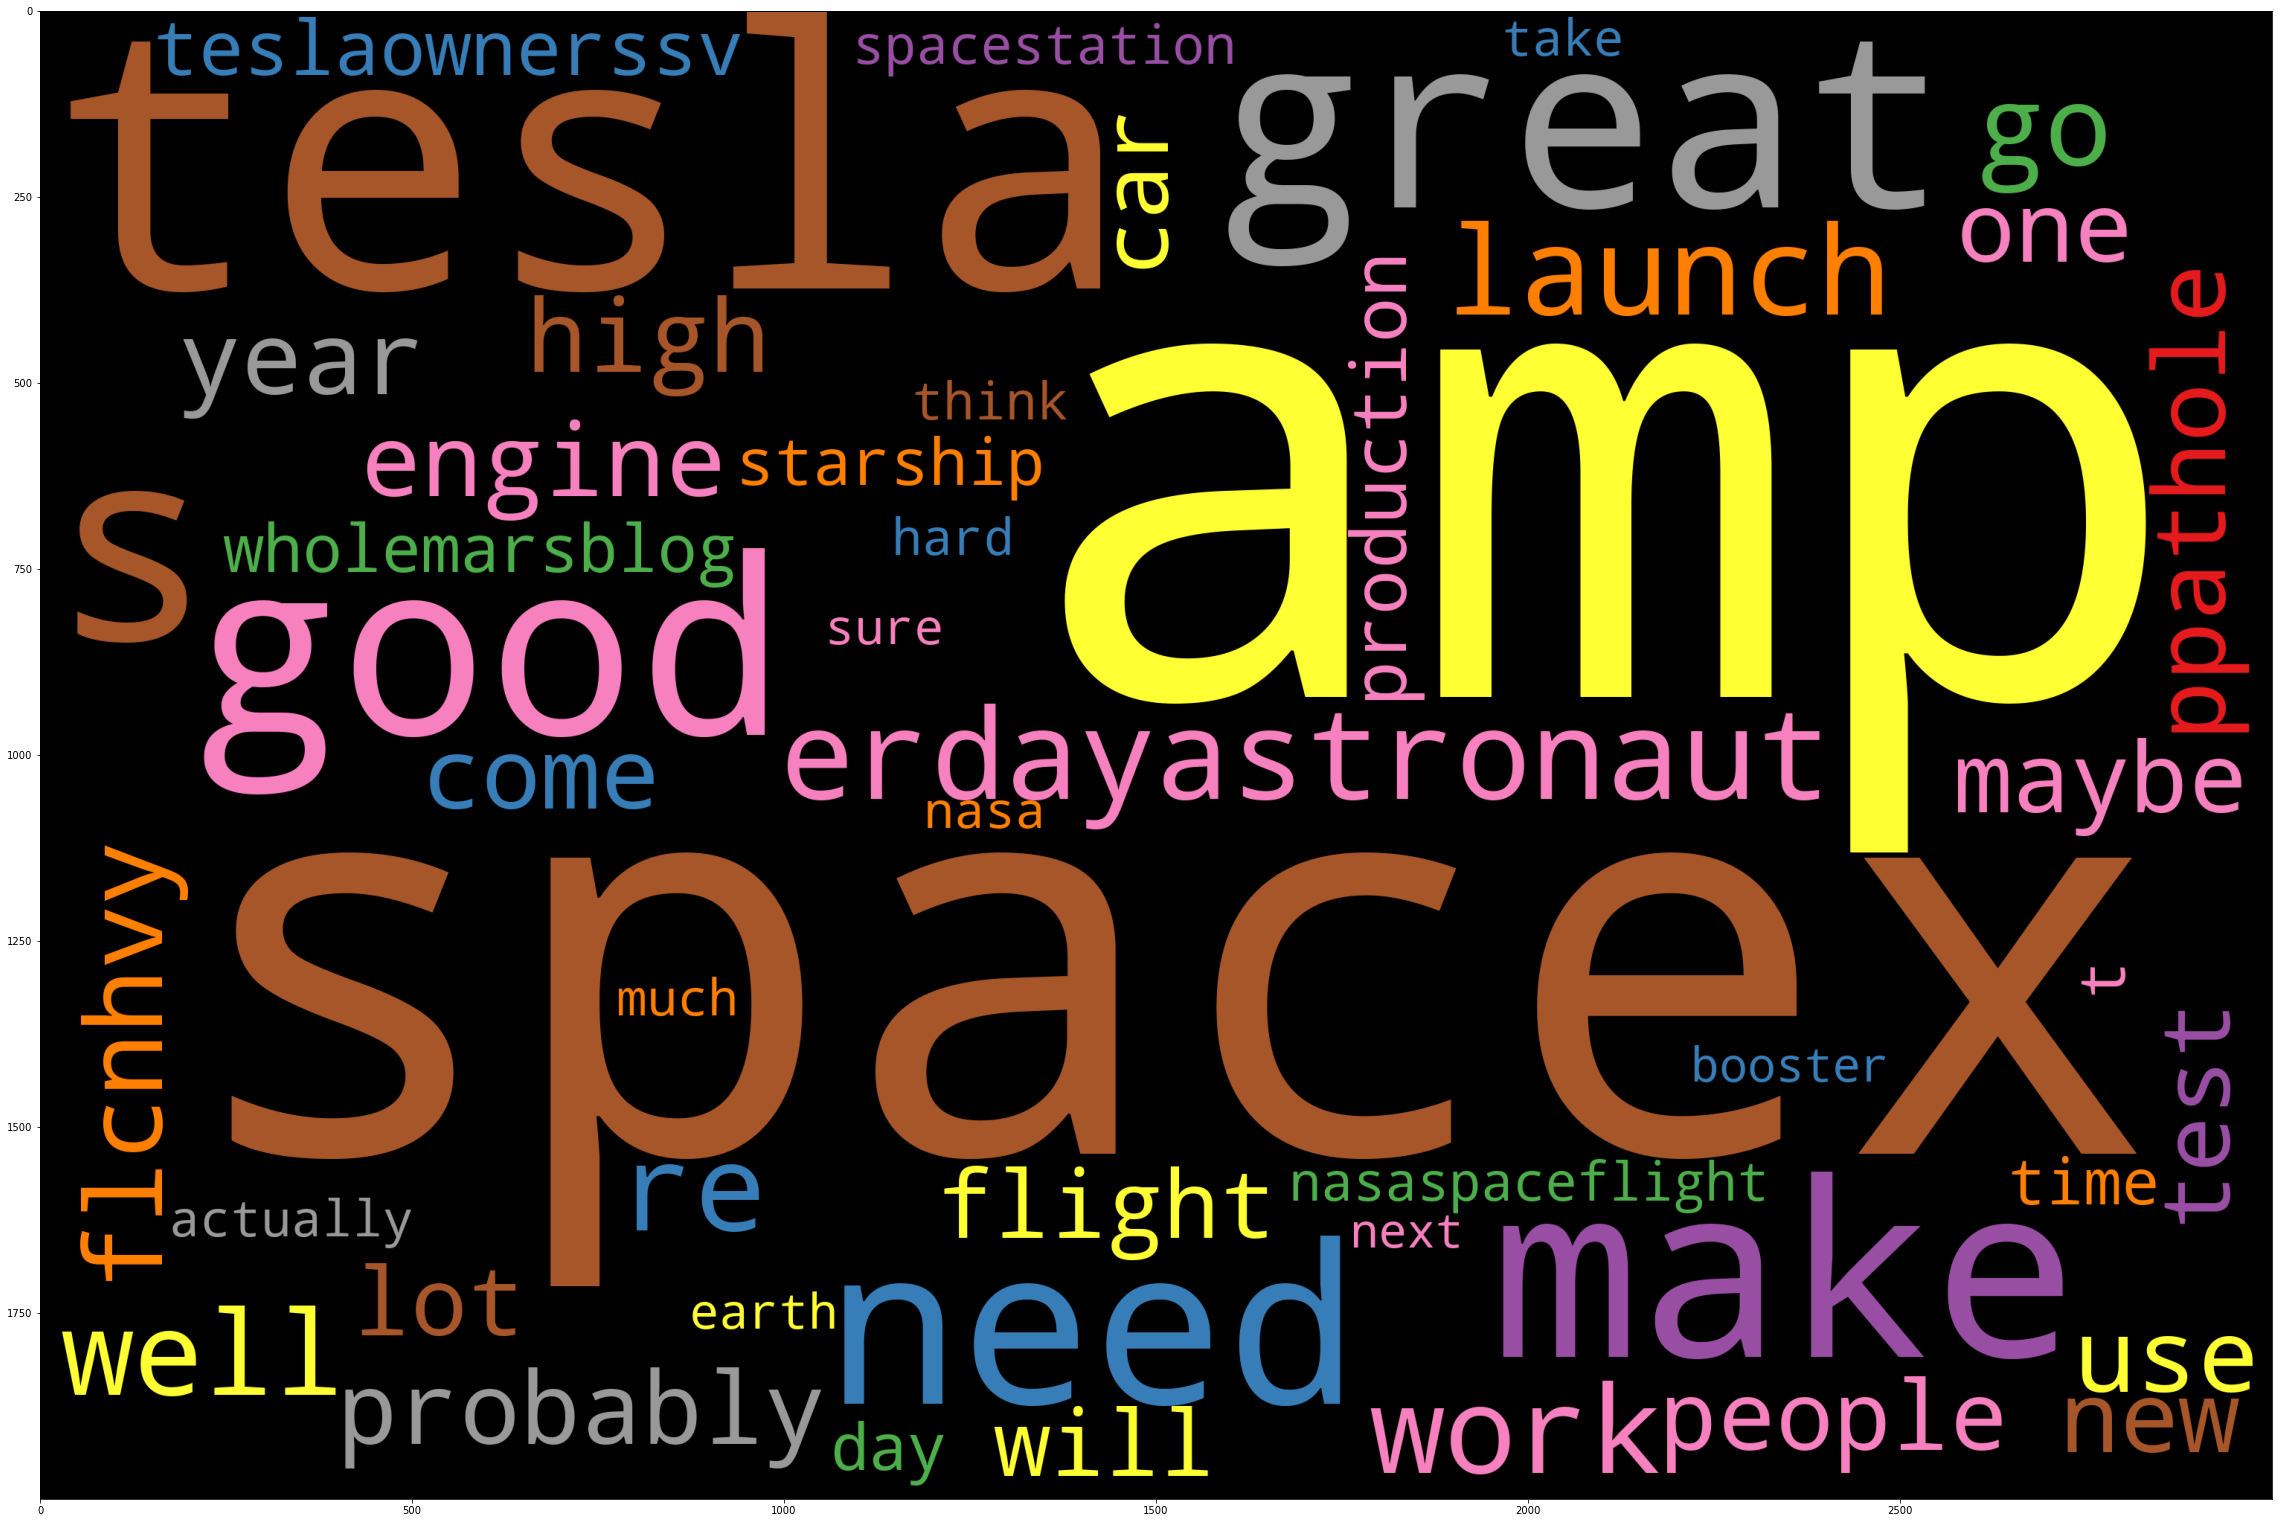

In [47]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('on')
    

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## named entry recognatation

In [48]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [49]:
for token in doc_block:
    print(token,token.pos_)

i PRON
me PRON
my PRON
myself PRON
we PRON
our PRON
ours ADJ
ourselves PRON
you PRON
you PRON
're AUX
you PRON
've AUX
you PRON
'll AUX
you PRON
'd VERB
your PRON
yours PRON
yourself PRON
yourselves NOUN
he PRON
him PRON
his PRON
himself PRON
she PRON
she PRON
's AUX
her PRON
hers NOUN
herself PRON
it PRON
it PRON
's AUX
its PRON
itself PRON
they PRON
them PRON
their PRON
theirs NOUN
themselves PRON
what PRON
which PRON
who PRON
whom PRON
this PRON
that SCONJ
that PRON
'll AUX
these PRON
those DET
am NOUN
is AUX
are AUX
was VERB
were AUX
be AUX
been AUX
being AUX
have AUX
has AUX
had AUX
having AUX
do VERB
does AUX
did AUX
doing VERB
a DET
an PRON
the PRON
and CCONJ
but CCONJ
if SCONJ
or CCONJ
because SCONJ
as ADP
until ADP
while SCONJ
of ADP
at ADP
by ADV
for ADP
with ADP
about ADP
against ADP
between ADP
into ADP
through ADP
during ADP
before ADV
after ADP
above ADV
below ADP
to PART
from ADP
up ADP
down ADV
in ADP
out ADV
on ADP
off ADP
over ADV
under ADP
again ADV
further ADV
then 

## filtering verbs

In [50]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

["'d", 'yourselves', 'hers', 'theirs', 'am', 'was', 'do', 'doing', 't', 'don', 'd', 've', 'ain', 'aren', 'didn', 'doesn', 'hasn', 'haven', 'mightn', 'mustn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn', 'kunalb11', 'ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'spotify', 'interviewgtera27', 'execution', 'year', 'year', 'ox', 'thought', 'fail', 'represent', 'time', 'allocationthe', 'outcome', 'send', 'clubhouse', 'kanyew', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmode', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'unlock', 'power', 'wallet', 'won\x92t', 'give', 'key', 'avoid', 'costsfreewalletorg', 'app', 'sucksrt', 'spacex', 'launch', 'element', 'gateway', 'mission', 'yesblkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'amp', 'endeavor', 'adamklotz', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'price', 'country', 'difference', 'taxis', 'amp', 's

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df 
#Viewing top 20 Results

,word,count
0,spacex,203
1,amp,176
2,tesla,89
3,make,63
4,launch,57
...,...,...
2645,priority,1
2646,waitvistacruiser7,1
2647,propaganda,1
2648,click,1


## checking top words in bargraph

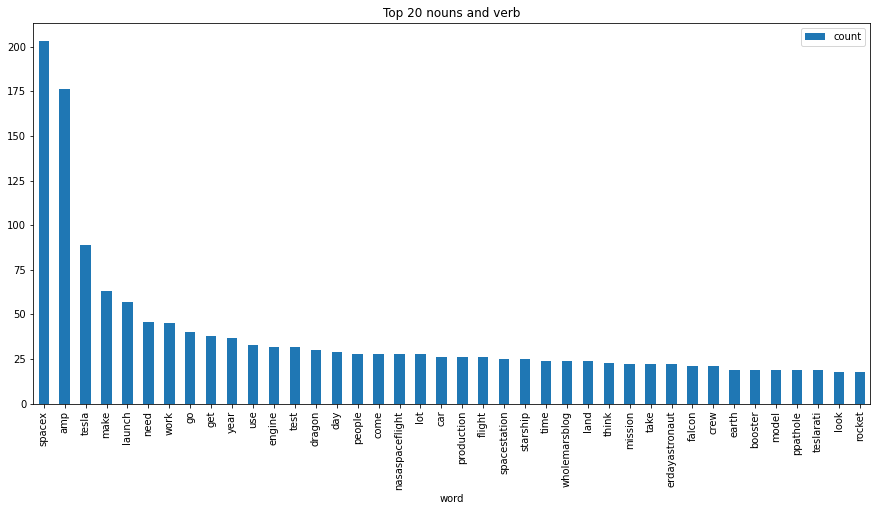

In [52]:
wd_df[0:40].plot.bar(x='word',figsize=(15,7),title='Top 20 nouns and verb');

## Emotion Mining -Sentiment Analysis

In [53]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(em))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [54]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


## affin

+ Afinn is the simplest yet popular lexicons used for sentiment analysis 


In [56]:
# Emotion Lexicon - Affin
affin=pd.read_csv('C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment on textmining\\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [57]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [58]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [59]:
calculate_sentiment(text='hate')

-3

In [60]:
calculate_sentiment(text='Great')

3

In [61]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [62]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [63]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [64]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [65]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [66]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [67]:
sent_df['index']=range(0,len(sent_df))## adding index column
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

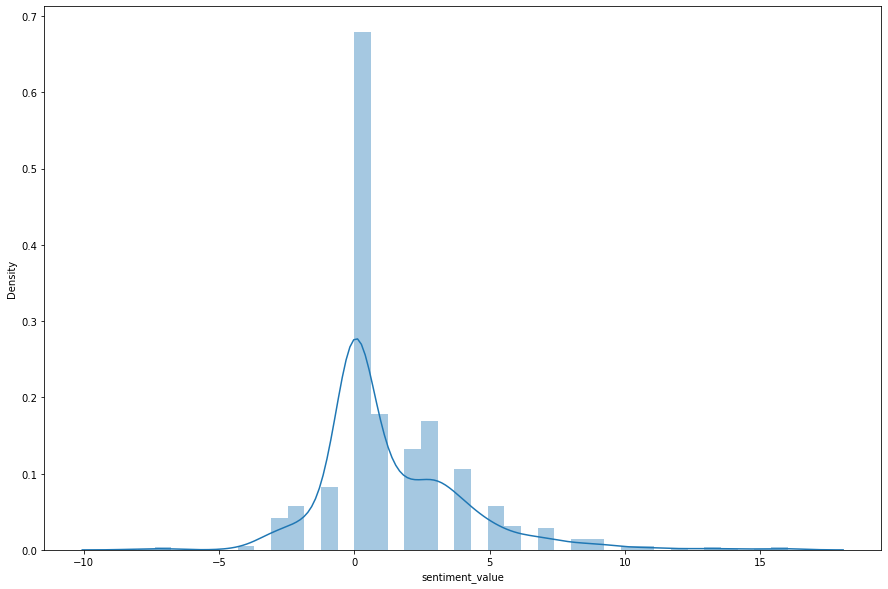

In [68]:
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

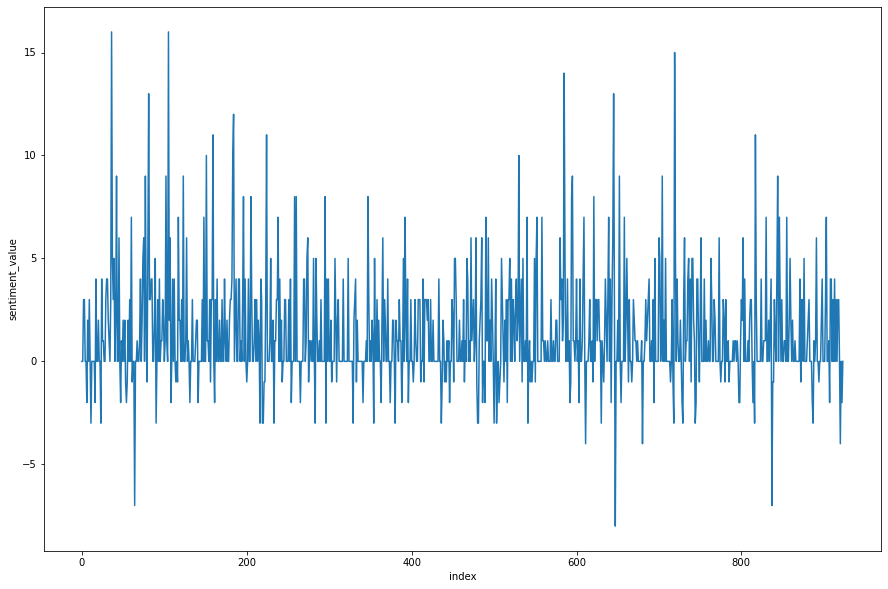

In [69]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

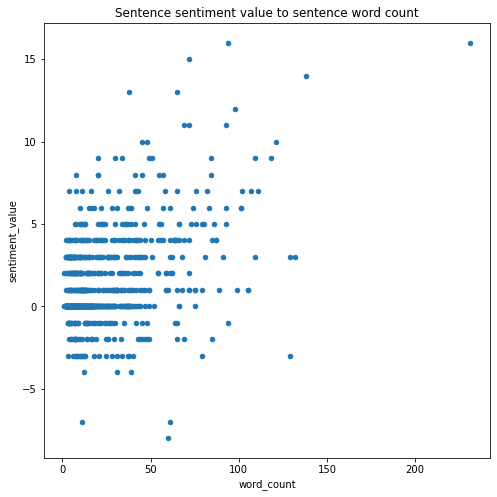

In [70]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

## Extract reviews of any product from ecommerce website like amazon, Perform emotion mining


In [71]:
! pip install AutoScraper

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=24702fca3980e138995fc6c6d0ba9d70e3133730a438fa3a7c3c1c8c1ef80218
  Stored in directory: c:\users\sunee\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [72]:
from autoscraper import AutoScraper

In [73]:
url = 'https://www.amazon.in/Apple-MacBook-14-inch-8%E2%80%91core-14%E2%80%91core/dp/B09JR8TX74'
wanted_list = ['Best laptop for pros.']

## extracting Review of apple laptop from Ecommerce from amazon

In [74]:
scraper= AutoScraper()
result=scraper.build(url,wanted_list)
print(result)

['the balance of the laptop is a bit off. It wobbles with both of my palms around touchpad while typing.Battery is worse than my 2015 MacBook Air. I used to clock in at least 8 hours while watching a movie and now with 14" Pro, I get about the same on low power mode.The dock hanged on me yesterday and a quick YouTube search will reveal the hang/freeze issue. (I\'m not the only one. ) I had to restart.Touchpad is an oil grabbing surface. It will look dirty right after one hour of use.Basic apps like twitter will take significant load time like I\'m sitting on intel processor.Keyboard is noisy. I mean I love mechanical keyboards and the keyboard on 14" feels great for like (2 days) and after a while it\'s just a weird typing experience. (Though this is highly subjective as well)Touch ID is slow and not as snappy as you\'d expect it.Overall, everything is great but not that great. I understand this is v1 of the product. If you wanna wait till v2, maybe that\'s gonna improve a few things. 

## Sentiment analysis

In [75]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(" ".join(result))
sentences[0:] 

['the balance of the laptop is a bit off.',
 'It wobbles with both of my palms around touchpad while typing.Battery is worse than my 2015 MacBook Air.',
 'I used to clock in at least 8 hours while watching a movie and now with 14" Pro, I get about the same on low power mode.The dock hanged on me yesterday and a quick YouTube search will reveal the hang/freeze issue.',
 "(I'm not the only one. )",
 'I had to restart.Touchpad is an oil grabbing surface.',
 "It will look dirty right after one hour of use.Basic apps like twitter will take significant load time like I'm sitting on intel processor.Keyboard is noisy.",
 'I mean I love mechanical keyboards and the keyboard on 14" feels great for like (2 days) and after a while it\'s just a weird typing experience.',
 "(Though this is highly subjective as well)Touch ID is slow and not as snappy as you'd expect it.Overall, everything is great but not that great.",
 'I understand this is v1 of the product.',
 "If you wanna wait till v2, maybe tha

In [76]:
sent_df = pd.DataFrame(sentences, columns=['Reviews'])
sent_df 

,Reviews
0,the balance of the laptop is a bit off.
1,It wobbles with both of my palms around touchp...
2,I used to clock in at least 8 hours while watc...
3,(I'm not the only one. )
4,I had to restart.Touchpad is an oil grabbing s...
...,...
59,.
60,.
61,.
62,.


In [77]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [78]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [79]:
sent_df['sentiment_value'] = sent_df['Reviews'].apply(calculate_sentiment) 

In [80]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['Reviews'].str.split().apply(len)
sent_df['word_count']

0      9
1     18
2     42
3      6
4      9
      ..
59     1
60     1
61     1
62     1
63     1
Name: word_count, Length: 64, dtype: int64

In [81]:
sent_df

,Reviews,sentiment_value,word_count
0,the balance of the laptop is a bit off.,0,9
1,It wobbles with both of my palms around touchp...,-3,18
2,I used to clock in at least 8 hours while watc...,0,42
3,(I'm not the only one. ),0,6
4,I had to restart.Touchpad is an oil grabbing s...,0,9
...,...,...,...
59,.,0,1
60,.,0,1
61,.,0,1
62,.,0,1


In [82]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    64.000000
mean      1.671875
std       2.856653
min      -3.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      11.000000
Name: sentiment_value, dtype: float64

In [83]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

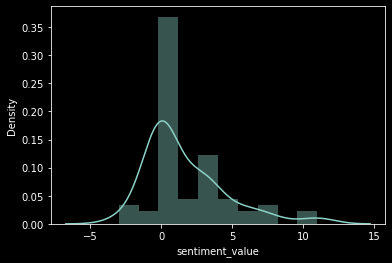

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
sns.distplot(sent_df['sentiment_value']) 

In [85]:
print(sent_df['sentiment_value'].skew())
print(sent_df['sentiment_value'].kurt())

1.4600990372998597
2.250144360532202


###  the curve is very skew so i can say that this is a positive centement

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

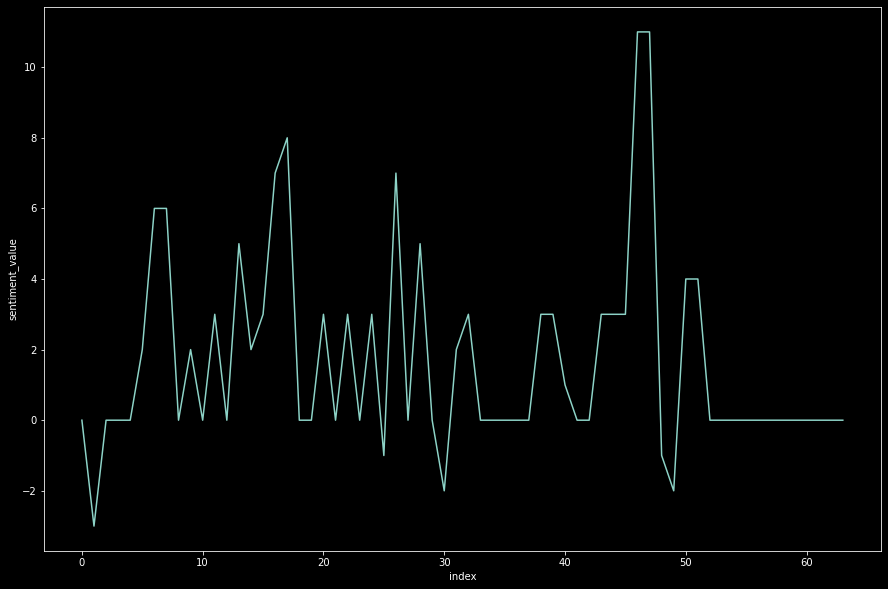

In [86]:
plt.figure(figsize=(15, 10))
plt.style.use(['dark_background'])
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

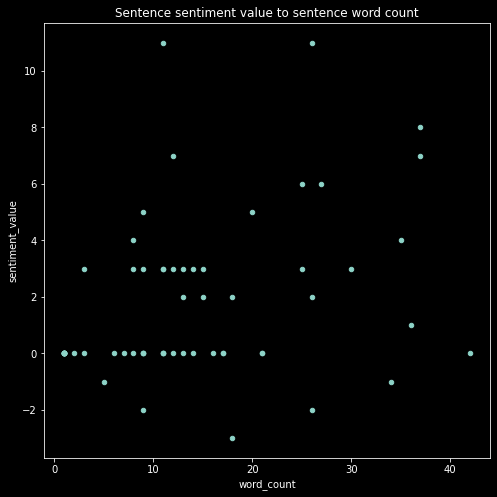

In [87]:
plt.style.use(['dark_background'])
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

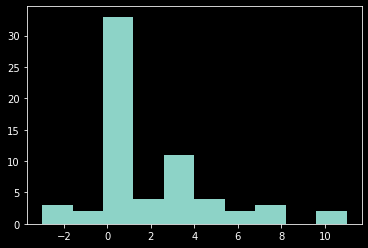

<Figure size 720x360 with 0 Axes>

In [88]:
#another style for visualisation
plt.style.use(['dark_background'])
plt.hist(sent_df['sentiment_value'])
plt.figure(figsize=(10,5))
xlabel='sentiment_value'

  By visualization and Analysis we can observe that most of the reviews have **sentiment value** is greater than zero i.e., **Positive review** about the laptop **apple laptop**